# Applied Machine Learning (Assignment - 1)

> NOT ALL THE BELOW CODE SECTION ARE MANDATORY. EXHUASTIVE METHODS ARE LISTED. 
> ORDER OF THE STEPS CAN BE CHANGED OR REPEATED. BUT DO NEED NOT DELETE UNUSED SECTIONS
> CELLS WITH '### Edit here....' CAN BE USED TO WRITE ABSTRACT & COMPLETE ANSWERS IN NO MORE THAN 5 SENTENCES]

### Evaluation
We wish to evaluate based on 
- Coding practices being followed
- Commenting to explain the code and logic behind doing something
- Your understanding and explanation of data
- How good the logic would perform on similar datasets

>In this assignment , you should be able to:
>>1. Quickly understand the data set
>>2. Represent this dataset as a Dataframe. The primary object in Pandas that will be used throughout this course is DataFrame. DataFrame is a two dimensional tabular, column-oriented data structure with both row and column labels.
>>3. Perform basic operations / manipulations on this dataset
>>4. Perform some statistical and visual analysis using pandas
>>5. Identify and pre-process the data set

### The description of data can be found here: 
http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

### Attribute Information:

#### 1.date: Date in format dd/mm/yyyy 
#### 2.time: time in format hh:mm:ss 
#### 3.global_active_power: household global minute-averaged active power (in kilowatt) 
#### 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
#### 5.voltage: minute-averaged voltage (in volt) 
#### 6.global_intensity: household global minute-averaged current intensity (in ampere) 
#### 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
#### 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
#### 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


In [23]:
from datetime import datetime

# datetime object containing current date and time
start_time = datetime.now()
 
print("start_time =", start_time)

# dd/mm/YY H:M:S
dt_string = start_time.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

start_time = 2021-09-10 23:49:04.918641
date and time = 10/09/2021 23:49:04


## 1. Import necessary libraries


In [24]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.model_selection import KFold#used for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making


## 2. Function/Subroutines (This centralized definitions can be called anywhere in below sections)

 
 Purpose:To predict Global Power consumption , in case we perform supervised machine learning activity latter
 
 Input:All features 
 
 Output:Data Frame divided into features and label 
 
 

# Machine-Leaning: Time Series Data may require LSTM Data Preparation and feature engineering


### * We may apply recurrent nueral network (LSTM) in the future which is best suited for time-series and sequential problem. This approach is the best if we have large data  and we have lot of instances here

### * I will therefore frame a supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.The below function does that.It is not mandatory to run it.

In [25]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [26]:
#Function -2 : Input: Output: Purpose:

In [27]:
#Function -3 : Input: Output: Purpose:

## 3. Import the dataset and Analyse


### 3.1. Create Dataframe 


In [28]:
df = pd.read_csv('household_power_consumption.txt')
df.head(10)

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
5,16/12/2006;17:29:00;3.520;0.522;235.020;15.000...
6,16/12/2006;17:30:00;3.702;0.520;235.090;15.800...
7,16/12/2006;17:31:00;3.700;0.520;235.220;15.800...
8,16/12/2006;17:32:00;3.668;0.510;233.990;15.800...
9,16/12/2006;17:33:00;3.662;0.510;233.860;15.800...


In [29]:
df = pd.read_csv('household_power_consumption.txt', sep=';', ##This step is a part of feature creation,may be ran from the cell marked for the same
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

### 1) Note that data include 'nan' and '?' as a string. I converted both to numpy nan in importing stage (above) and treated both of them the same. 

### 2) I also merged two columns 'Date' and 'Time' to 'dt'. 

### 3) Also converted in the above, the data to time-series type, by taking index to be the time. 

### 3.2. Data Summarization 


In [30]:
df.head() 


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [32]:
df.dtypes


Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [33]:
df.shape


(2075259, 7)

In [34]:
df.columns


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [35]:
for j in range(1,7):
       print(df.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

#### 3.2.1 Pivoting or other techniques


In [36]:
df.head()
df1 =df.copy()

In [37]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [38]:
df2=df.resample('Y').sum().copy()
df2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-31,41813.282,2889.436,5.309773e+06,1.765948e+05,27460.0,48712.0,162951.0
2007-12-31,582708.186,61225.736,1.248792e+08,2.485492e+06,642548.0,854360.0,3022840.0
2008-12-31,564893.094,61705.338,1.267873e+08,2.398458e+06,584784.0,661905.0,3179187.0
2009-12-31,562315.198,68505.726,1.261044e+08,2.374625e+06,592657.0,592145.0,3556816.0
2010-12-31,485295.102,59199.366,1.104678e+08,2.048404e+06,451686.0,503909.0,3313373.0


In [39]:
df2['GLB_ACTIVE_PWR_WH'] = (df2['Global_active_power'] * 1000 / 60)


In [40]:
df2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,GLB_ACTIVE_PWR_WH
dt,,,,,,,,
2006-12-31,41813.282,2889.436,5.309773e+06,1.765948e+05,27460.0,48712.0,162951.0,6.968880e+05
2007-12-31,582708.186,61225.736,1.248792e+08,2.485492e+06,642548.0,854360.0,3022840.0,9.711803e+06
2008-12-31,564893.094,61705.338,1.267873e+08,2.398458e+06,584784.0,661905.0,3179187.0,9.414885e+06
2009-12-31,562315.198,68505.726,1.261044e+08,2.374625e+06,592657.0,592145.0,3556816.0,9.371920e+06
2010-12-31,485295.102,59199.366,1.104678e+08,2.048404e+06,451686.0,503909.0,3313373.0,8.088252e+06


In [41]:
df2.pivot_table( ['GLB_ACTIVE_PWR_WH','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'], columns='dt')

dt,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31
GLB_ACTIVE_PWR_WH,6.968880e+05,9.711803e+06,9.414885e+06,9.371920e+06,8.088252e+06
Global_intensity,1.765948e+05,2.485492e+06,2.398458e+06,2.374625e+06,2.048404e+06
Sub_metering_1,2.746000e+04,6.425480e+05,5.847840e+05,5.926570e+05,4.516860e+05
Sub_metering_2,4.871200e+04,8.543600e+05,6.619050e+05,5.921450e+05,5.039090e+05
Sub_metering_3,1.629510e+05,3.022840e+06,3.179187e+06,3.556816e+06,3.313373e+06
Voltage,5.309773e+06,1.248792e+08,1.267873e+08,1.261044e+08,1.104678e+08


### 3.3. Attribute Comparison 


Here we get the five number summary of this data set

In [42]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


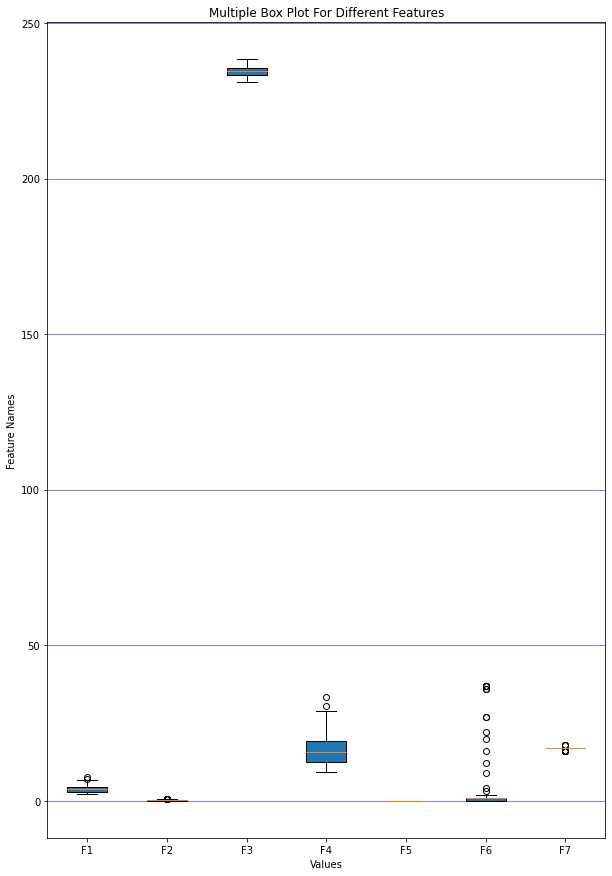

In [43]:
import matplotlib.pyplot as plt
labels=['F1','F2','F3','F4','F5','F6','F7']
fig, ax = plt.subplots(figsize=(10,15))
ax.grid(color='blue', axis='y', linestyle='-', linewidth=0.5, alpha=1)
plt.boxplot(df.head(100),vert=True, patch_artist=True, labels=labels) 
plt.xlabel('Values')
plt.ylabel('Feature Names')

plt.title('Multiple Box Plot For Different Features')

plt.show()

### The number of records are huge as can be seen from the shape. As such we take the boxplot for first 100 records and find that there are considerable number of outliers for 6th Feature. Since drawing a boxplot for all instances does not give a good visualization, we proceed with other visualization techniques.

## 4. Data Sampling

###The dataset is for predicting Global Active power usage of a household over a period of time.The data constitute of instances spread over several, days , months and years.We have to analyse when the household is using what amount of power.The power consumption is set to vary across different months and years because of vacations, season etc.To great better value of predicted Global Average power consumption, the more instances will give us better insight.Since the number of features are less and lot of instances are there equally spread over months and days, Simple Random Sampling should be adequete.

### 4.1 Training Vs Test Sets To be ran after normalization, However kept here to match this template for assignment



### * First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data.

### *** PLEASE NOTE THAT THIS CELL IS TO BE RAN AFTER NORMALIZATION but kept here to match the assignment template

In [76]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format so that it can be used for Machine learning techniques
#for time series analysis like LSTM

(8760, 1, 7) (8760,) (25399, 1, 7) (25399,)


### 4.2 Custom Sampling


We have done several custom sampling by resampling the data on monthly basis, hourly basis, yearly basis or daily basis.
Following is an example of resampling on the basis of Month

In [45]:
df['Global_active_power'].resample('M').sum()


dt
2006-12-31    41813.282
2007-01-31    69011.862
2007-02-28    56488.886
2007-03-31    58862.192
2007-04-30    35181.466
2007-05-31    44008.872
2007-06-30    35682.828
2007-07-31    29703.830
2007-08-31    34096.460
2007-09-30    41872.606
2007-10-31    49276.370
2007-11-30    55918.644
2007-12-31    72604.170
2008-01-31    65169.382
2008-02-29    49331.072
2008-03-31    55590.594
2008-04-30    48209.992
2008-05-31    45721.860
2008-06-30    42943.972
2008-07-31    35477.418
2008-08-31    12341.880
2008-09-30    42667.792
2008-10-31    50696.460
2008-11-30    59908.760
2008-12-31    56833.912
2009-01-31    62950.008
2009-02-28    50222.090
2009-03-31    54758.986
2009-04-30    49275.524
2009-05-31    45209.830
2009-06-30    33541.980
2009-07-31    27590.444
2009-08-31    29076.404
2009-09-30    42628.564
2009-10-31    51088.720
2009-11-30    55067.642
2009-12-31    60905.006
2010-01-31    59379.658
2010-02-28    55471.706
2010-03-31    48155.898
2010-04-30    44378.124
2010-05-31   

### * In order to reduce the computation time, and also get a quick result to test the model.  One can resmaple the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above.   

In [46]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

## 5. Data Cleaning

### Since the day to day average consumption is important for prediction, we have replaced the missing value of each features with the mean value of that feature so that all data points(instances) are considered.


### 5.1 Imputation


In [47]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [48]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())


In [49]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### 5.2 Text Cleaning


### 5.3 Anamoly Detection


## 6. Data Transformation


### 6.1 Feature Creation


In [50]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [51]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [52]:

## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

### New feature "remaining watt-hours" which can be calculated from the active energy by first converting the active energy to watt-hours then subtracting the other sub-metered active energy in watt-hours

In [53]:
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [54]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.099998


In [55]:
df.to_csv('household_power_consumption.csv')

### 6.2 Discretization


### 6.3 Normalization


## * Note: I scale all features in range of [0,1]. 

In [56]:
## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)#Only this much is essential for data analysis in assignment 1
# frame as supervised learning----Only if we need to use this for supervised learning later.
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


### * Above I showed 7 input variables (input series) and the 1 output variable for 'Global_active_power' at the current  time in hour (depending on resampling). 

### 6.4 Binarization


## 7. Data Comparison


### 7.1 Similarity 


## The correlations between 'Global_intensity' and  'Global_active_power'

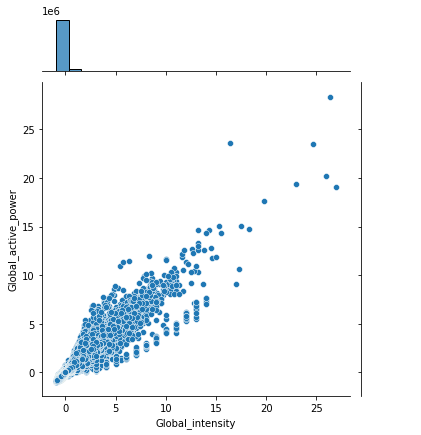

In [57]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

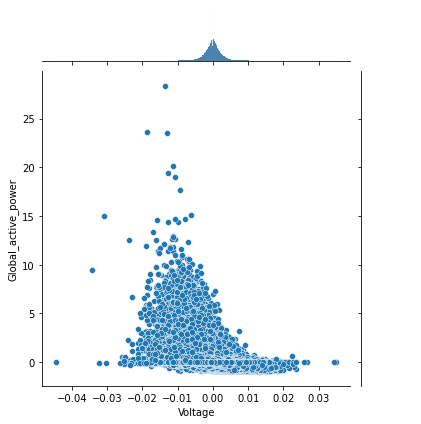

In [58]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

### * From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose. 

# Correlations among features


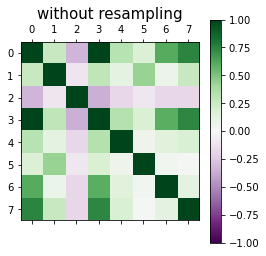

In [59]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

# Correlations of mean of resampled features 

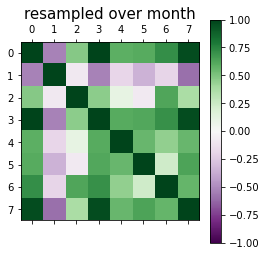

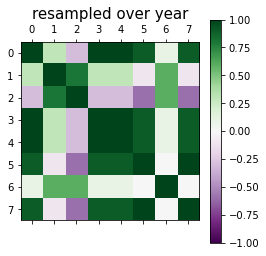

In [60]:
# Correlations of mean of features resampled over months


plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

### * It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature  engineering.

### 7.2 Dissimilarity 


### Edit here to summarizes from your observation on section 7

## 8. Simple Visualizations 


### 8.1 Numerical


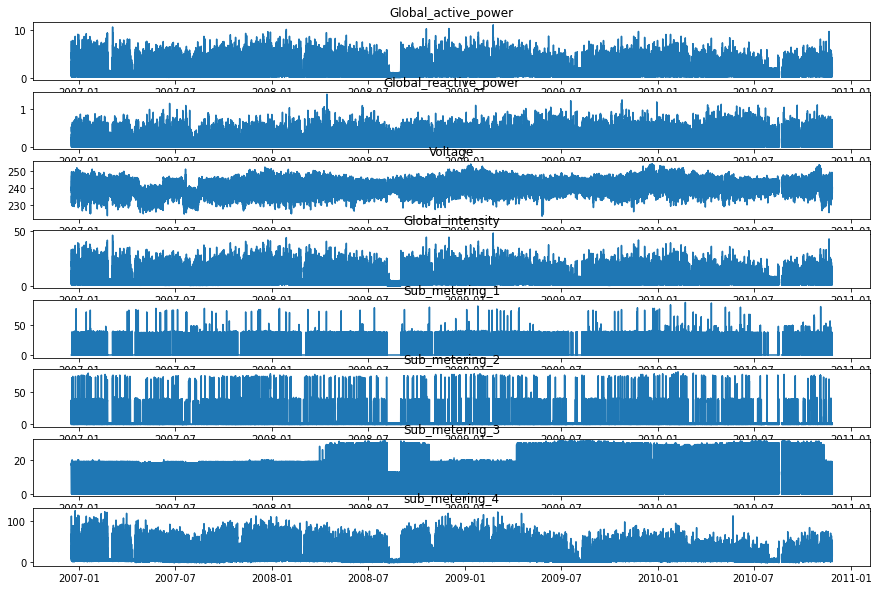

In [61]:
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['dt'], index_col=['dt'])
# line plot for each variable
pyplot.figure(figsize=(15, 10))
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name)
pyplot.show()


### contribution of sub_metering_4 seems to decrease with time,matching up with the solid increase in seen towards the end of the series for Sub_metering_3

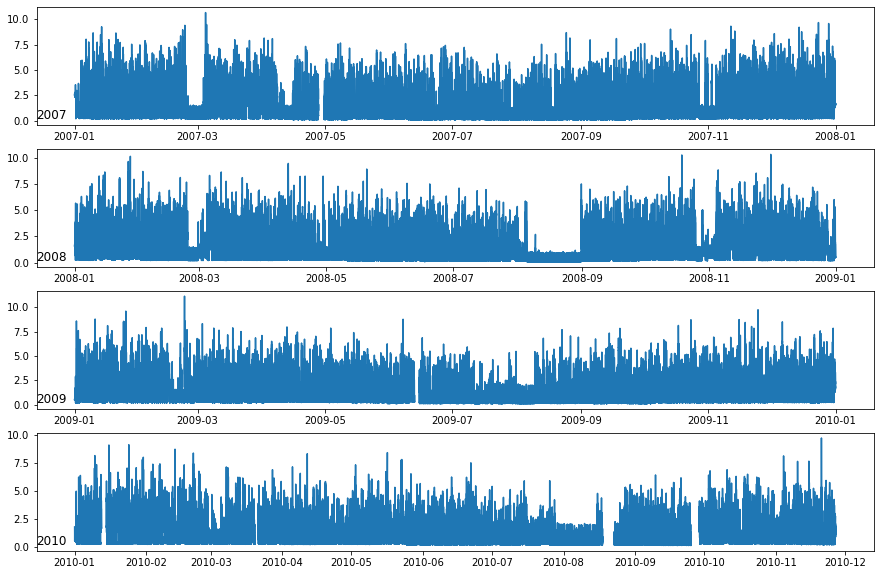

In [62]:
##creating a new plot of the active power for each year to see if there are any common patterns across the years
years = ['2007', '2008', '2009', '2010']
pyplot.figure(figsize=(15, 10))
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

### We can see some common gross patterns across the years, such as around Feb-Mar and around Aug-Sept where we see a marked decrease in consumption.

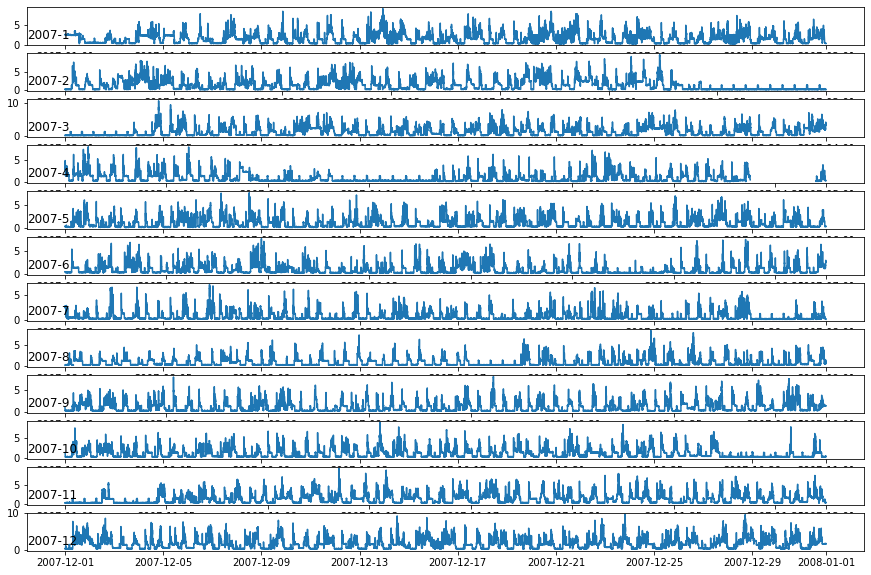

In [63]:
## plotting consumption one for each month in 2007
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(15, 10))
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()


### We can see that there are stretches of days with very minimal consumption, such as in August and in April. These may represent vacation periods where the home was unoccupied and where power consumption was minimal.

### 8.1.1 Distribution


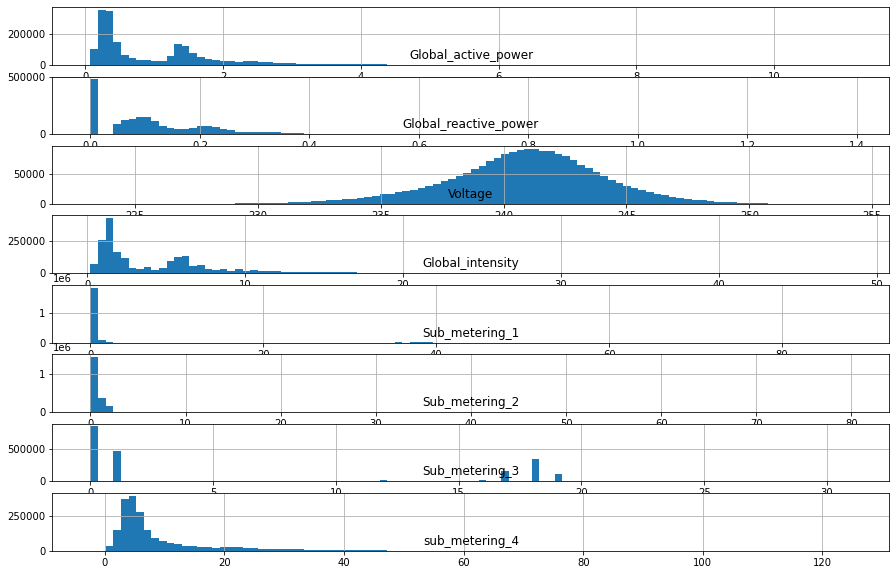

In [64]:
##creating a histogram for each variable in the time series
pyplot.figure(figsize=(15, 10))
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

### distribution of voltage data is strongly Gaussian.


### 8.2 Categorical


### 8.3 Time Series


### * Below I resample over day, and show the sum and mean of Global_active_power. It is seen that mean and sum of resampled data set, have similar structure.

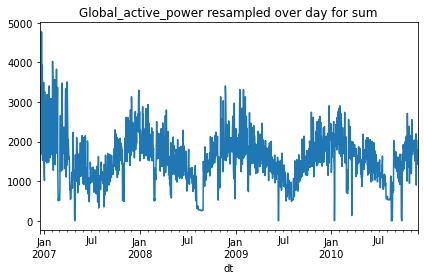

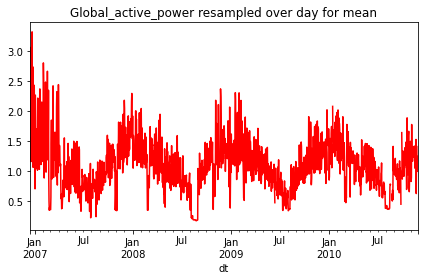

In [65]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

### Below I show mean and std of 'Global_intensity' resampled over day 


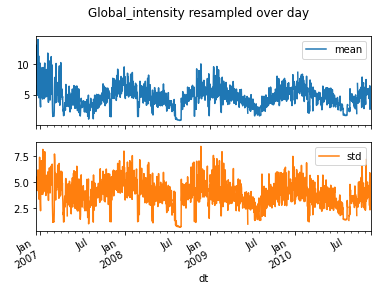

In [66]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

### Below I show mean and std of 'Global_reactive_power' resampled over day 

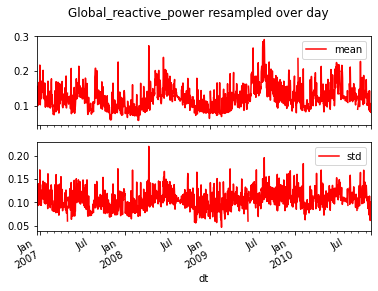

In [67]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

### Sum of 'Global_active_power' resampled over month


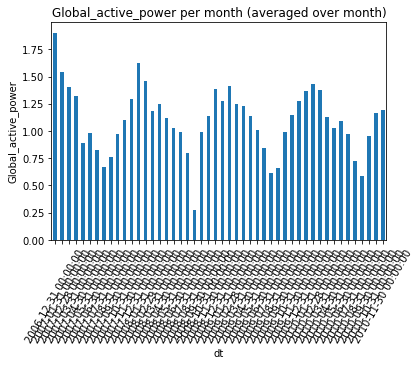

In [68]:
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

## Mean of 'Global_active_power' resampled over quarter


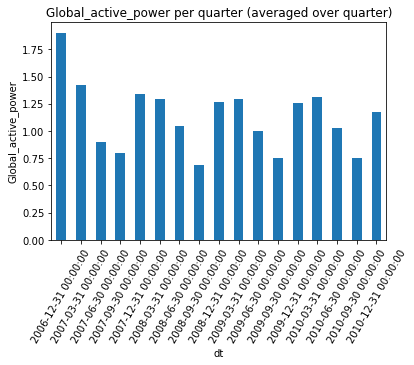

In [69]:
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

### * It is very important to note from above two plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering. 

## mean of 'Voltage' resampled over month

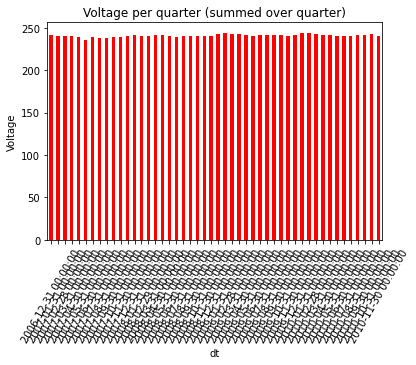

In [70]:
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

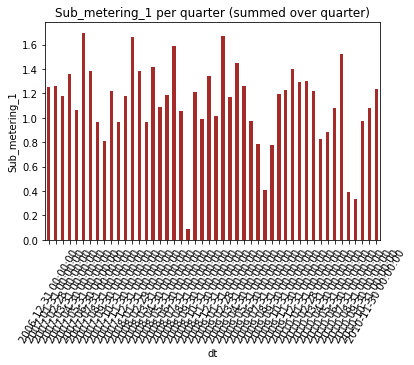

In [71]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

### * It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection.  

# Below I compare the mean of different features resampled over day. 

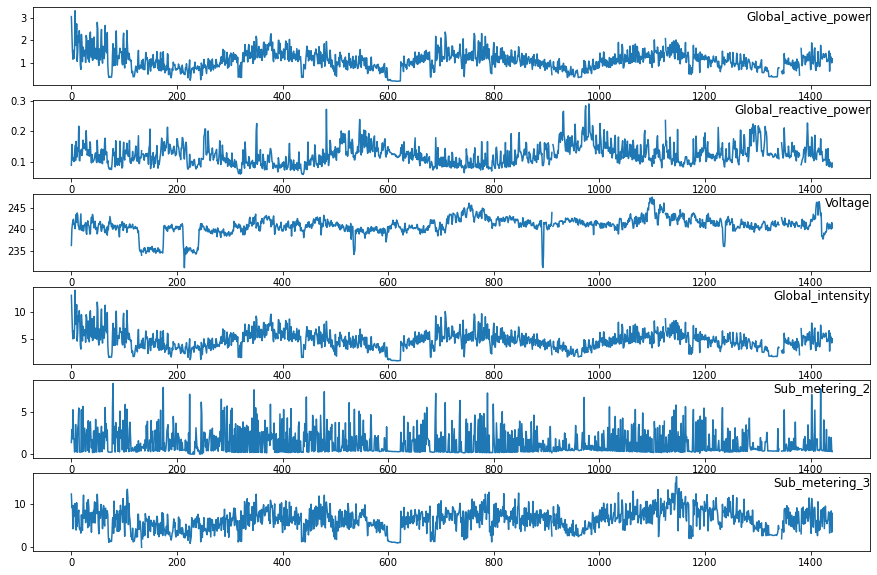

In [72]:
cols = [0, 1, 2, 3, 5, 6]
i = 1
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in cols:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

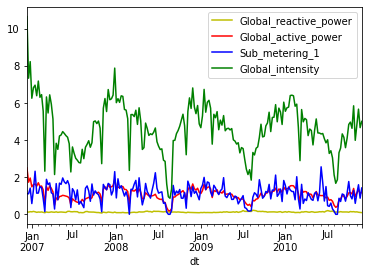

In [73]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

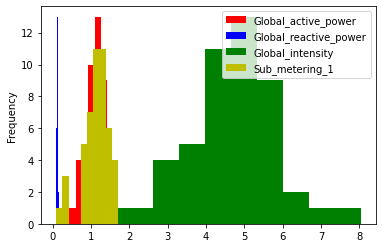

In [74]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

# Proof of Current Run 


In [75]:

from datetime import datetime

# datetime object containing current date and time
end_time = datetime.now()
 
print("end_time =", end_time)

# dd/mm/YY H:M:S
dt_string = end_time.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

end_time = 2021-09-10 23:58:34.870675
date and time = 10/09/2021 23:58:34


### 8.4 Textual


### 8.5 Grouping


### 8.6 Heirarchy


### Edit here to summarize your inference from above visualizations